TO DO

- comment corriger par le revenus ? j'ai cette heterogeneité par revenus mais il me faudrait une mesure de financial stress ou BC compression ?
- determinant age interessant - couple marreid aussi mais je peux aller moins loin que prevu pour le moment
- ne pas perdre de vue who got committed ? 



Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
#HBDbhdhbsdhq
# Définir le chemin d'accès complet au fichier CSV
file_path = 'C:/Users/ludov/Dropbox/economics/thesis/EC/data/CEX/intrvw23/fmli232.csv'

# Lire le fichier CSV
df = pd.read_csv(file_path)


Get data and distribution of income and totexp

In [40]:
# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "TOTEXPCQ", "FINATXE1", "CUTENURE", "SHELTCQ","ESHELTRC", "EHOUSNGP", "HOUSCQ", "UTILCQ", "HOUSOPCQ", "RNTXRPCQ", 
                     "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC", "AGE_REF","ETOTAPX4","ST_HOUS","MARITAL1"]
data_ce = df[columns_to_select]

data_ce = data_ce[(data_ce['FINATXE1'] > 0) & (data_ce['TOTEXPCQ'] > 0)]

display(data_ce.describe())


,NEWID,TOTEXPCQ,FINATXE1,CUTENURE,SHELTCQ,ESHELTRC,EHOUSNGP,HOUSCQ,UTILCQ,HOUSOPCQ,...,APPARCQ,MAJAPPCQ,FURNTRCQ,HLTHINCQ,ECARTKNC,ECARTKUC,AGE_REF,ETOTAPX4,ST_HOUS,MARITAL1
count,3.155000e+03,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,...,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000
mean,5.247905e+06,8942.354319,87492.245008,2.288748,1922.067195,2286.257370,3338.027682,3033.366614,561.259588,263.080190,...,166.904068,51.199472,72.597464,526.688536,248.058003,235.043106,53.978764,9049.854984,1.996513,2.329319
std,8.733804e+04,9330.953579,81493.030803,1.306045,2440.209296,2789.284615,3718.142366,3190.224628,414.055524,634.508848,...,305.684854,356.987046,435.725667,656.687716,2462.115407,1551.191517,17.581043,8734.180029,0.058953,1.597084
min,5.102364e+06,348.400000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,334.800000,1.000000,1.000000
25%,5.215343e+06,3680.833350,33155.000000,1.000000,589.166650,700.000000,1314.833500,1252.166650,272.000000,47.000000,...,0.000000,0.000000,0.000000,82.833300,0.000000,0.000000,40.000000,3850.475000,2.000000,1.000000
50%,5.265642e+06,6335.333300,64963.000000,2.000000,1300.000000,1512.667000,2356.333000,2181.333300,474.000000,107.000000,...,77.333300,0.000000,0.000000,336.000000,0.000000,0.000000,54.000000,6699.517000,2.000000,1.000000
75%,5.345856e+06,10878.583300,117545.500000,4.000000,2366.333350,2899.333500,4149.833500,3687.333300,752.000000,236.000000,...,200.000000,0.000000,0.000000,693.666650,0.000000,0.000000,68.000000,11327.325000,2.000000,3.000000
max,5.366911e+06,152926.405300,998562.000000,6.000000,42635.666700,43690.667000,83207.333000,47027.000000,4877.000000,12650.000000,...,5000.000000,10564.000000,9600.000000,8316.000000,97650.000000,47599.000000,87.000000,164730.572000,2.000000,5.000000


Annual Households income

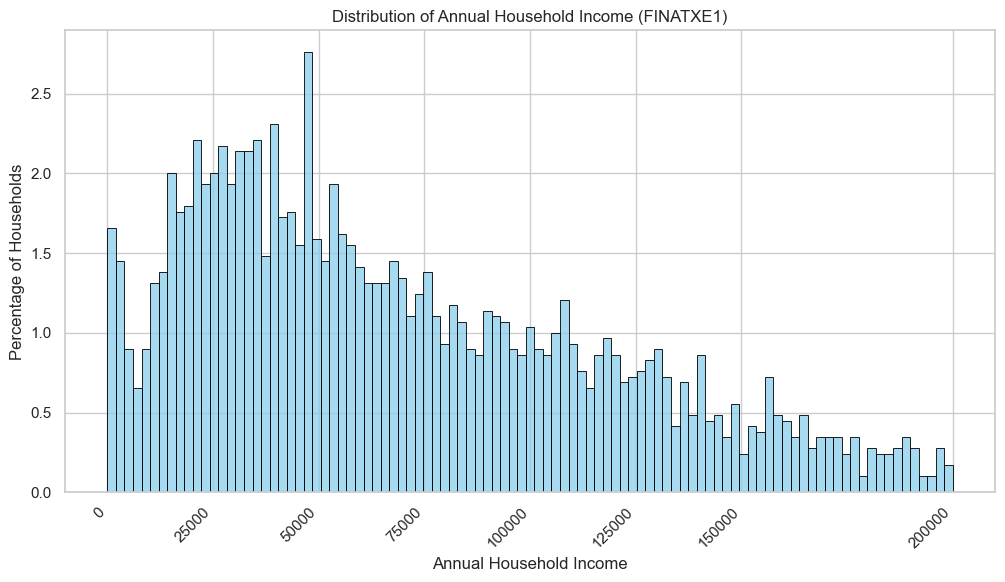

In [3]:
# Configurer le style de seaborn
sns.set(style="whitegrid")

# Définir les nouveaux bins pour l'histogramme
income_bins = list(np.linspace(0, 200000, 100))  # 100 bins en total

# Créer l'histogramme avec la courbe de densité
plt.figure(figsize=(12, 6))
sns.histplot(data=data_ce, x='FINATXE1', bins=income_bins, kde=False, color='skyblue', stat='percent', edgecolor='black')

# Ajouter des étiquettes et un titre
plt.title('Distribution of Annual Household Income (FINATXE1)')
plt.xlabel('Annual Household Income')
plt.ylabel('Percentage of Households')

# Personnaliser les ticks de l'axe x pour afficher des valeurs arbitraires de revenus
x_tick_labels = [0, 25000, 50000, 75000, 100000, 125000, 150000, 200000]
plt.xticks(x_tick_labels, rotation=45, ha='right')  # Rotation diagonale pour une meilleure lisibilité

plt.show()


Income decile 

C:\Users\ludov\AppData\Local\Temp\ipykernel_15152\1278019943.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_income_by_decile = data_ce.groupby('Decile')['FINATXE1'].mean().reindex(decile_labels)
C:\Users\ludov\AppData\Local\Temp\ipykernel_15152\1278019943.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_income_by_decile.index, y=mean_income_by_decile.values, palette='Blues')


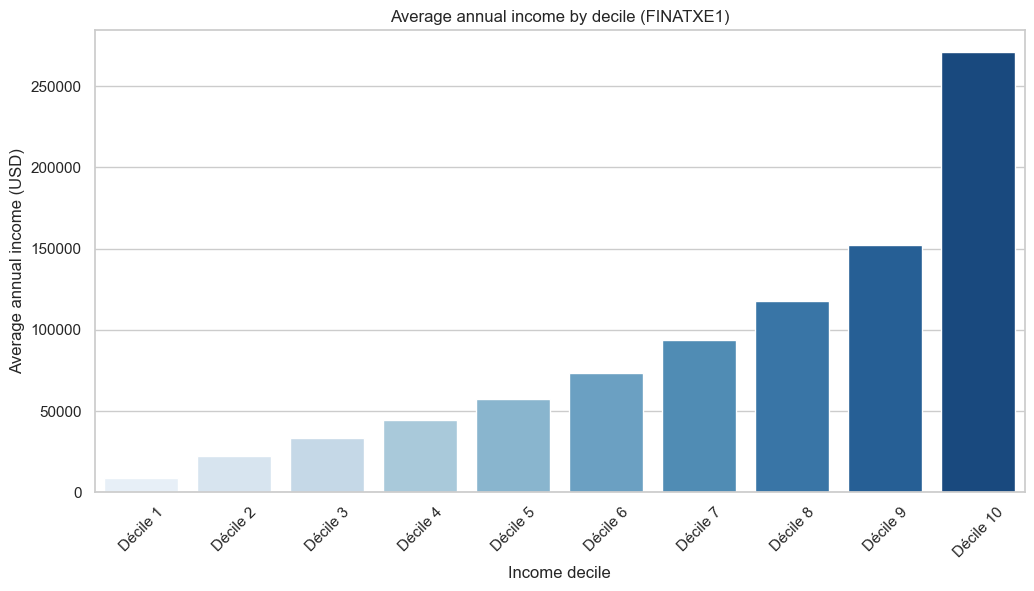

,Décile,Average annual income (USD)
0,Décile 1,8922.636076
1,Décile 2,22618.273016
2,Décile 3,33305.772152
3,Décile 4,44643.679365
4,Décile 5,57203.449367
5,Décile 6,73418.790476
6,Décile 7,93790.568254
7,Décile 8,117576.287975
8,Décile 9,152439.669841
9,Décile 10,270843.354430


In [8]:
# Vérifier si data_1 est vide après le filtrage
if data_ce.empty:
    print("Aucune donnée disponible après le filtrage des revenus égaux à 0.")
else:
    # Configurer le style de seaborn
    sns.set(style="whitegrid")

    # Calculer les déciles
    deciles = np.percentile(data_ce['FINATXE1'], np.arange(0, 101, 10))

    # Créer un DataFrame pour les déciles
    decile_labels = [f'Décile {i+1}' for i in range(len(deciles)-1)]
    data_ce['Decile'] = pd.cut(data_ce['FINATXE1'], bins=deciles, labels=decile_labels, include_lowest=True)

    # Calculer la moyenne du revenu par décile
    mean_income_by_decile = data_ce.groupby('Decile')['FINATXE1'].mean().reindex(decile_labels)

    # Créer l'histogramme des moyennes des revenus par décile
    plt.figure(figsize=(12, 6))
    sns.barplot(x=mean_income_by_decile.index, y=mean_income_by_decile.values, palette='Blues')

    # Ajouter des étiquettes et un titre
    plt.title('Average annual income by decile (FINATXE1)')
    plt.xlabel('Income decile')
    plt.ylabel('Average annual income (USD)')

    # Afficher le graphique
    plt.xticks(rotation=45)
    plt.show()

    # Créer une table pour afficher les moyennes
    mean_income_table = pd.DataFrame(mean_income_by_decile).reset_index()
    mean_income_table.columns = ['Décile', 'Average annual income (USD)']

    # Afficher la table
    display(mean_income_table)

Annual households expenditure  ? see how to weight etc etc

Test different Housing measure 

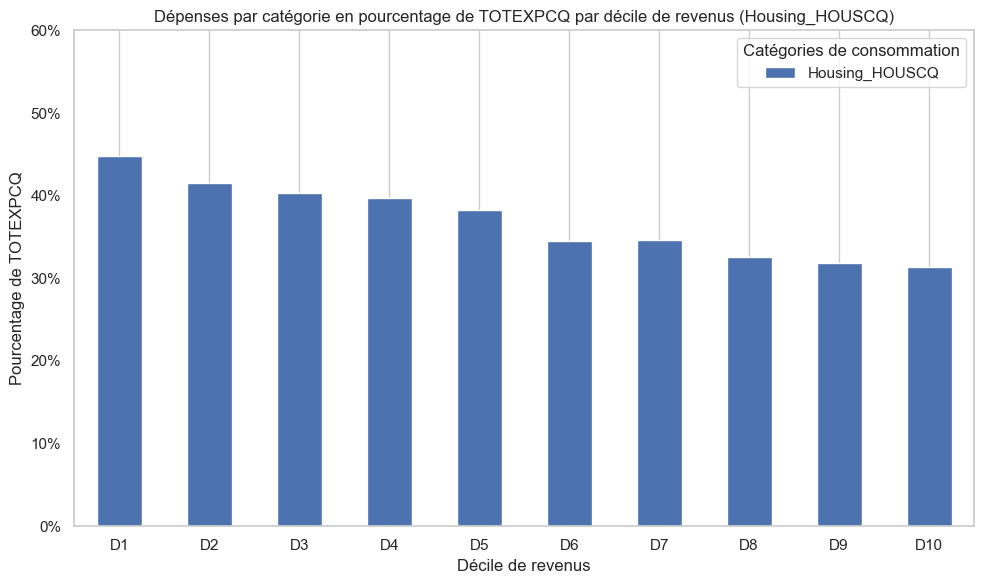

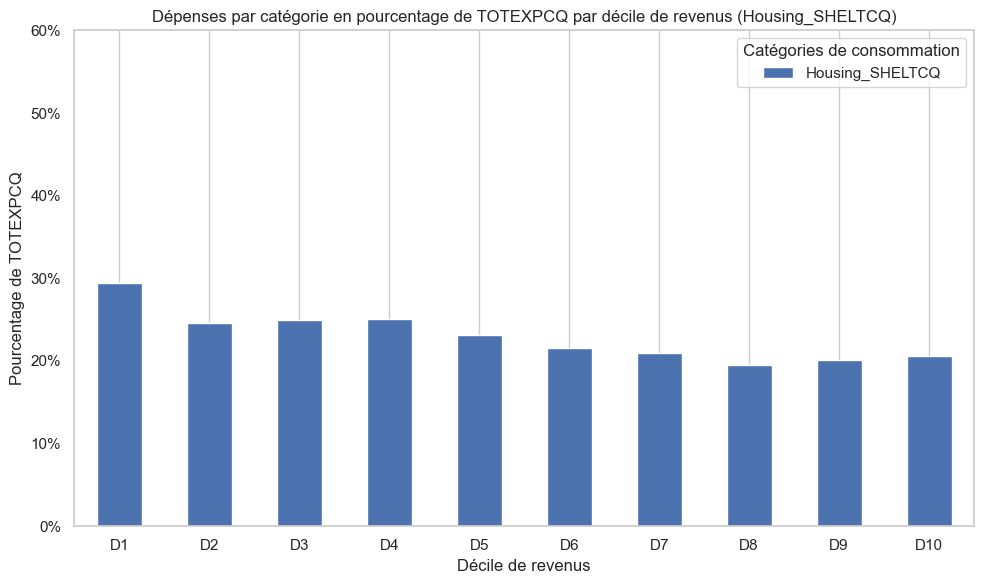

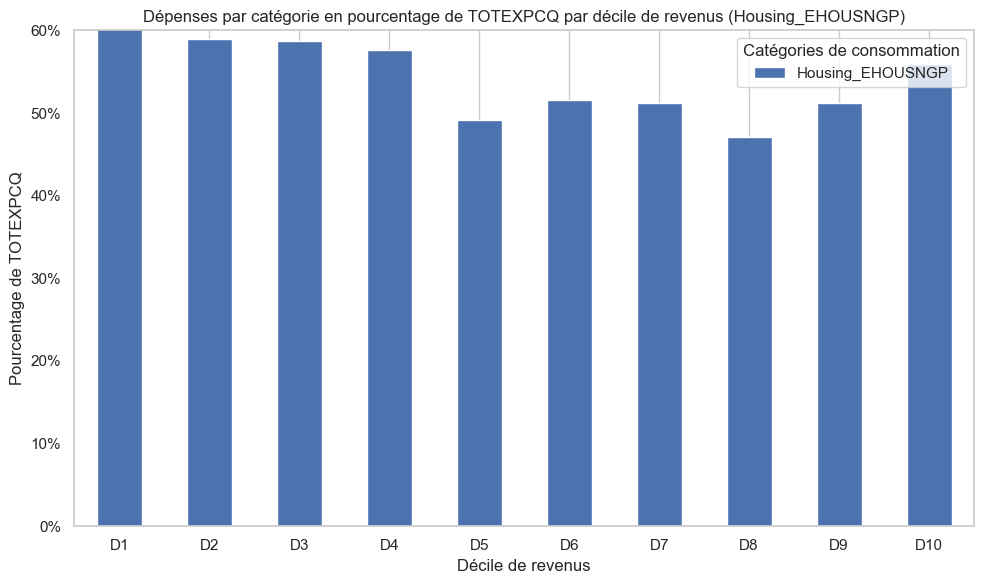

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "FINATXE1", "TOTEXPCQ", "FINCBTAX", "CUTENURE", "SHELTCQ", "EHOUSNGP", "HOUSCQ", "UTILCQ", "HOUSOPCQ", "RNTXRPCQ", 
                     "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC", "AGE_REF"]
data_ce = df[columns_to_select]

# Supprimer les lignes où TOTEXPCQ est égal à 0
data_ce = data_ce[data_ce["TOTEXPCQ"] != 0]

# Supprimer les observations où FINCBTAX < TOTEXPCQ
data_ce = data_ce[data_ce['FINCBTAX'] >= data_ce['TOTEXPCQ']]

# Calculer les parts pour les autres catégories
categories = {
    "Housing_HOUSCQ": ["HOUSCQ", "UTILCQ", "HOUSOPCQ", "FURNTRCQ", "MAJAPPCQ"],
    "Housing_SHELTCQ": ["SHELTCQ", "UTILCQ", "HOUSOPCQ", "FURNTRCQ", "MAJAPPCQ"],
    "Housing_EHOUSNGP": ["EHOUSNGP", "UTILCQ", "HOUSOPCQ", "FURNTRCQ", "MAJAPPCQ"],
    "Apparel": ["APPARCQ"],
    "Furniture/Appliances": ["FURNTRCQ", "MAJAPPCQ"],
    "Health Insurance": ["HLTHINCQ"],
    "Cars": ["ECARTKUC", "ECARTKNC"]
}

# Calculer les parts pour chaque catégorie
for category, columns in categories.items():
    if "Housing" in category:
        data_ce[category] = (data_ce[columns[0]]) / data_ce["TOTEXPCQ"] * 100
        # - data_ce["UTILCQ"] - data_ce["HOUSOPCQ"] - data_ce["FURNTRCQ"] - data_ce["MAJAPPCQ"]
    else:
        data_ce[category] = data_ce[columns].sum(axis=1) / data_ce["TOTEXPCQ"] * 100

# Classer les individus par décile de revenus (FINCBTAX)
data_ce['decile'] = pd.qcut(data_ce['FINCBTAX'], 10, labels=False, duplicates='drop')

# Calculer la moyenne des dépenses par décile pour chaque type de Housing
housing_types = ["Housing_HOUSCQ", "Housing_SHELTCQ", "Housing_EHOUSNGP"]
for housing_type in housing_types:
    decile_summary = data_ce.groupby('decile')[housing_type].mean()

    # Créer le graphique
    plt.figure(figsize=(10, 6))
    decile_summary.plot(kind='bar', stacked=True, ax=plt.gca())

    # Ajouter des labels et un titre
    plt.title(f'Dépenses par catégorie en pourcentage de TOTEXPCQ par décile de revenus ({housing_type})')
    plt.xlabel('Décile de revenus')
    plt.ylabel('Pourcentage de TOTEXPCQ')
    plt.xticks(ticks=range(10), labels=[f'D{i+1}' for i in range(10)], rotation=0)  # Étiquettes de D1 à D10

    # Ajuster l'axe des y pour qu'il aille de 0 à 60%
    plt.ylim(0, 60)
    plt.gca().yaxis.set_major_formatter(PercentFormatter())

    # Afficher les pourcentages dans les barres
    plt.legend(title='Catégories de consommation')
    plt.grid(axis='y')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

CE as share of quarterly expenditure ?

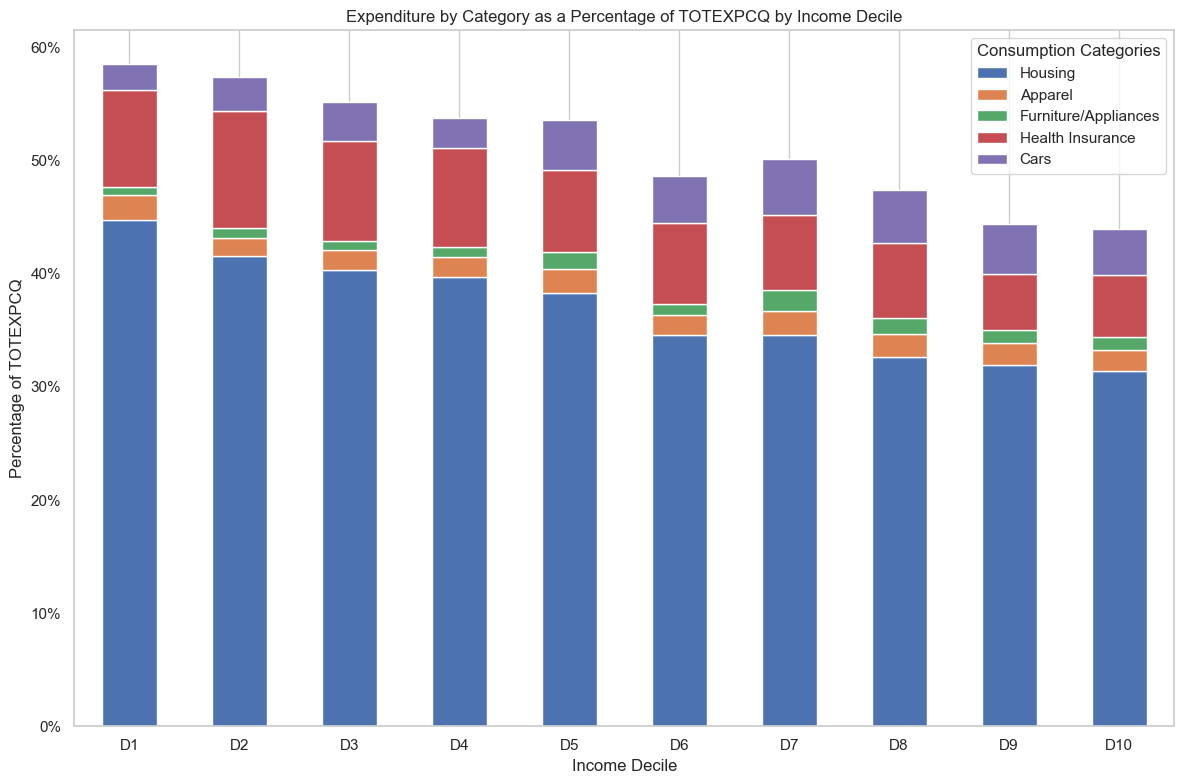

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "TOTEXPCQ", "FINCBTAX", "HOUSCQ", "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC"]
data_ce = df[columns_to_select]

# Supprimer les lignes où TOTEXPCQ est égal à 0
data_ce = data_ce[data_ce["TOTEXPCQ"] != 0]

# Supprimer les observations où FINCBTAX < TOTEXPCQ
data_ce = data_ce[data_ce['FINCBTAX'] >= data_ce['TOTEXPCQ']]

# Calculer les parts pour les autres catégories
categories = {
    "Housing": ["HOUSCQ"],
    "Apparel": ["APPARCQ"],
    "Furniture/Appliances": ["FURNTRCQ", "MAJAPPCQ"],
    "Health Insurance": ["HLTHINCQ"],
    "Cars": ["ECARTKUC", "ECARTKNC"]
}

# Calculer les parts pour chaque catégorie
for category, columns in categories.items():
    data_ce[category] = data_ce[columns].sum(axis=1) / data_ce["TOTEXPCQ"] * 100

# Classer les individus par décile de revenus (FINCBTAX)
data_ce['decile'] = pd.qcut(data_ce['FINCBTAX'], 10, labels=False, duplicates='drop')

# Calculer la moyenne des dépenses par décile
decile_summary = data_ce.groupby('decile')[list(categories.keys())].mean()

# Créer le graphique
plt.figure(figsize=(12, 8))
decile_summary.plot(kind='bar', stacked=True, ax=plt.gca())

# Ajouter des labels et un titre en anglais
plt.title('Expenditure by Category as a Percentage of TOTEXPCQ by Income Decile')
plt.xlabel('Income Decile')
plt.ylabel('Percentage of TOTEXPCQ')
plt.xticks(ticks=range(10), labels=[f'D{i+1}' for i in range(10)], rotation=0)  # Étiquettes de D1 à D10

# Afficher les pourcentages dans les barres
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(title='Consumption Categories')
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\ludov\AppData\Local\Temp\ipykernel_15152\1654414872.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = data_ce.groupby('age_category')[list(categories.keys())].mean()


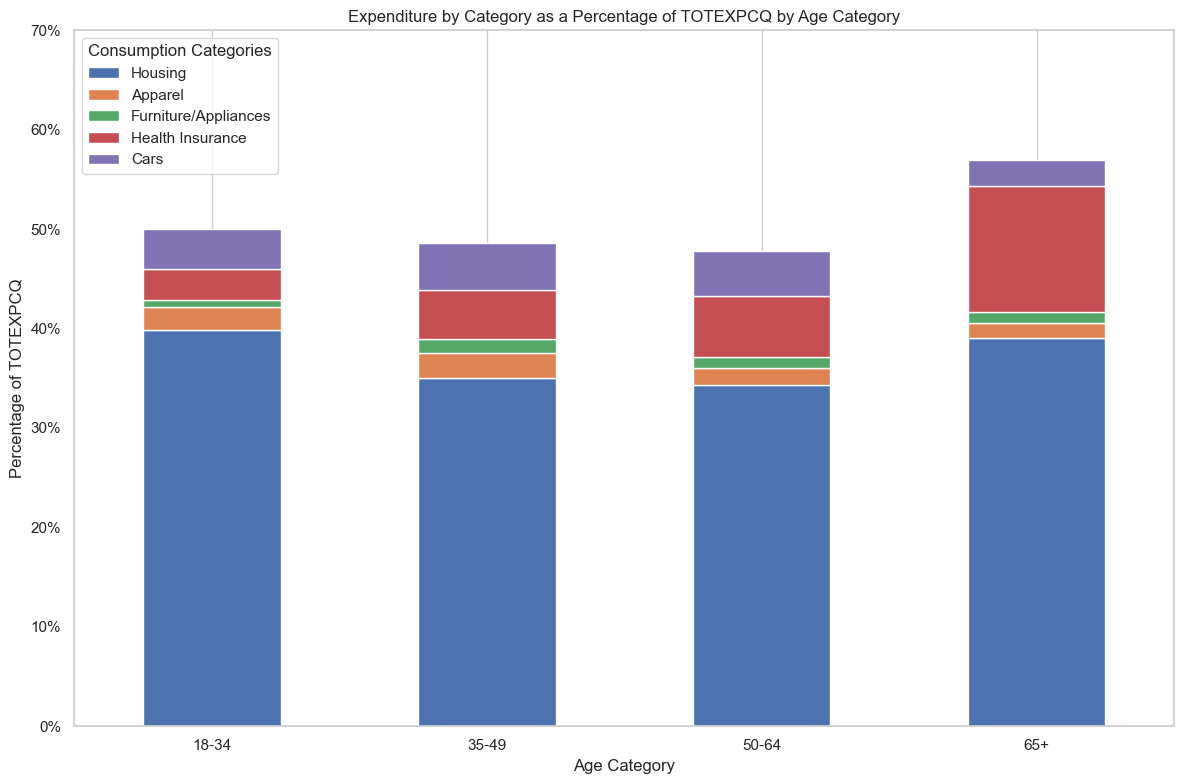

In [38]:
# Définir les catégories d'âge
bins = [18, 35, 50, 65, 100]
labels = ['18-34', '35-49', '50-64', '65+']
data_ce['age_category'] = pd.cut(data_ce['AGE_REF'], bins=bins, labels=labels, right=False)

# Calculer les parts pour chaque catégorie
for category, columns in categories.items():
    data_ce[category] = data_ce[columns].sum(axis=1) / data_ce["TOTEXPCQ"] * 100

# Calculer la moyenne des dépenses par catégorie d'âge
age_summary = data_ce.groupby('age_category')[list(categories.keys())].mean()

# Créer le graphique
plt.figure(figsize=(12, 8))
age_summary.plot(kind='bar', stacked=True, ax=plt.gca())

# Ajouter des labels et un titre en anglais
plt.title('Expenditure by Category as a Percentage of TOTEXPCQ by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of TOTEXPCQ')
plt.xticks(rotation=0)  # Étiquettes des catégories d'âge

# Afficher les pourcentages dans les barres
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.gca().set_ylim(0, 70) 
plt.legend(title='Consumption Categories')
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\ludov\AppData\Local\Temp\ipykernel_15152\1116944459.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_age_summary = data_ce.groupby(['decile', 'age_category'])[list(categories.keys())].mean()


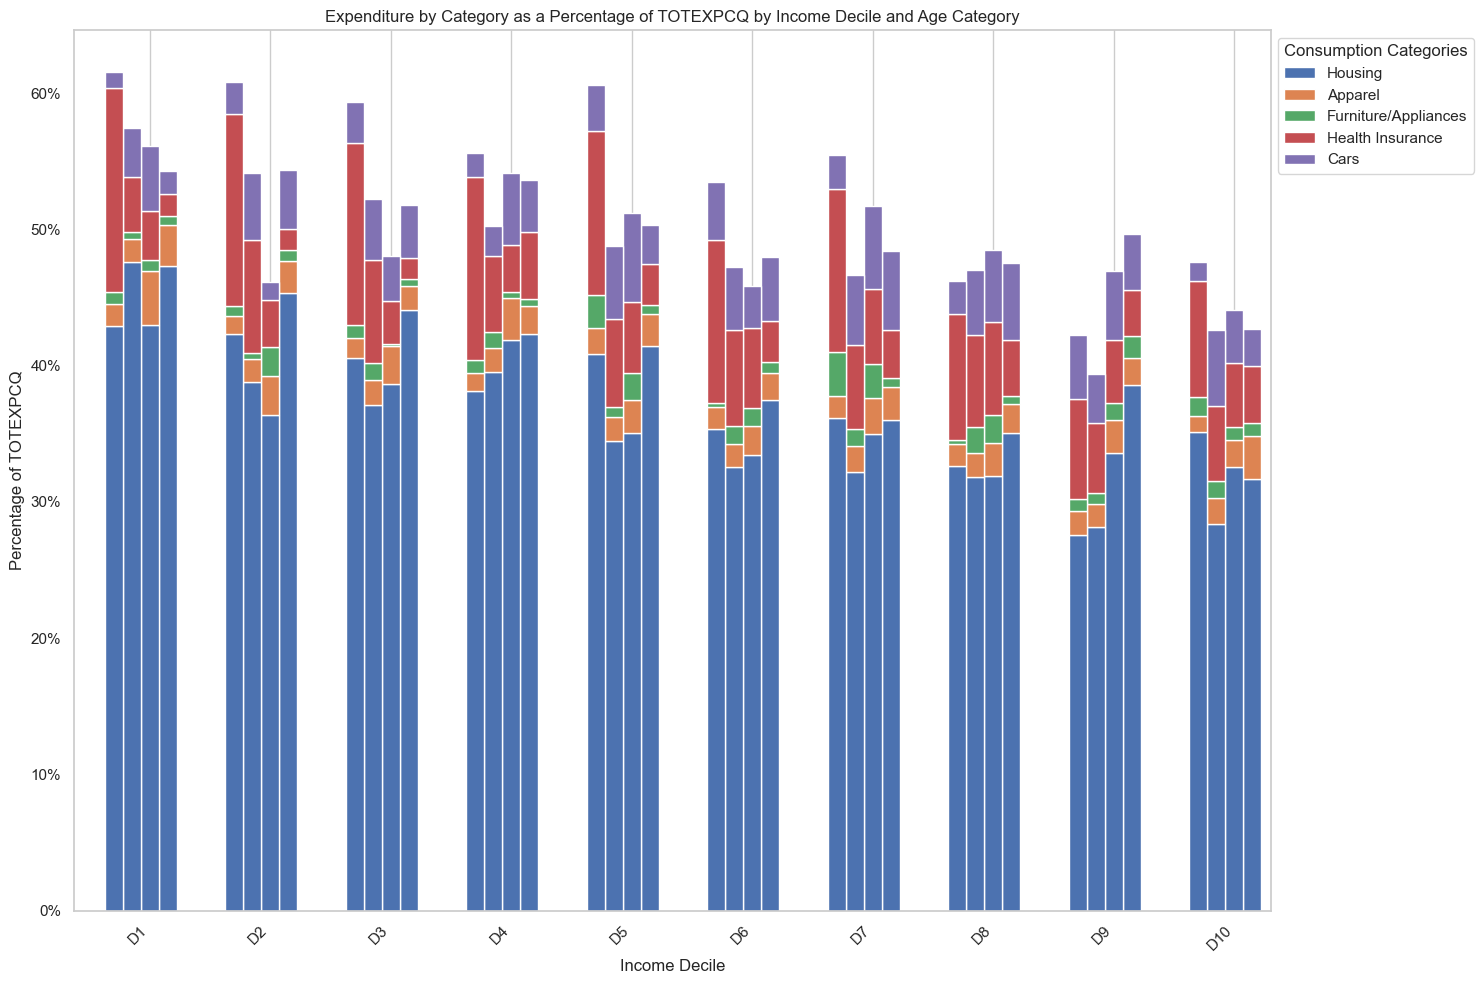

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "TOTEXPCQ", "FINCBTAX", "HOUSCQ", "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC", "AGE_REF"]
data_ce = df[columns_to_select]

# Supprimer les lignes où TOTEXPCQ est égal à 0
data_ce = data_ce[data_ce["TOTEXPCQ"] != 0]

# Supprimer les observations où FINCBTAX < TOTEXPCQ
data_ce = data_ce[data_ce['FINCBTAX'] >= data_ce['TOTEXPCQ']]

# Définir les catégories d'âge
bins = [18, 35, 50, 65, 100]
labels = [ '18-34', '35-49', '50-64', '65+']
data_ce['age_category'] = pd.cut(data_ce['AGE_REF'], bins=bins, labels=labels, right=False)

# Calculer les parts pour les autres catégories
categories = {
    "Housing": ["HOUSCQ"],
    "Apparel": ["APPARCQ"],
    "Furniture/Appliances": ["FURNTRCQ", "MAJAPPCQ"],
    "Health Insurance": ["HLTHINCQ"],
    "Cars": ["ECARTKUC", "ECARTKNC"]
}

# Calculate shares for each category
for category, columns in categories.items():
    data_ce[category] = data_ce[columns].sum(axis=1) / data_ce["TOTEXPCQ"] * 100

# Classify individuals by income decile (FINCBTAX)
data_ce['decile'] = pd.qcut(data_ce['FINCBTAX'], 10, labels=False, duplicates='drop')

# Calculate average expenditures by decile and age category
decile_age_summary = data_ce.groupby(['decile', 'age_category'])[list(categories.keys())].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each age category separately for each decile
width = 0.15
for i, age_category in enumerate(labels):
    decile_age_summary.xs(age_category, level='age_category').plot(kind='bar', stacked=True, ax=ax, position=i - 2.5, width=width)

# Add labels and title in English
plt.title('Expenditure by Category as a Percentage of TOTEXPCQ by Income Decile and Age Category')
plt.xlabel('Income Decile')
plt.ylabel('Percentage of TOTEXPCQ')

# Customize x-axis labels to include income deciles and age categories
new_labels = []
for i in range(10):
    new_labels.append(f'D{i+1}')
    for age_category in labels:
        new_labels.append(f'{age_category}')

# Set custom x-ticks
ticks = [i + j * width for i in range(10) for j in range(len(labels) + 1)]
plt.xticks(ticks=ticks, labels=new_labels, rotation=45, ha='right')

# Adjust x-tick positions to align with bars
ax.set_xticks([i + 2 * width for i in range(10)])
ax.set_xticklabels([f'D{i+1}' for i in range(10)])

# Display percentages in the bars
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.legend(categories.keys(), title='Consumption Categories', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

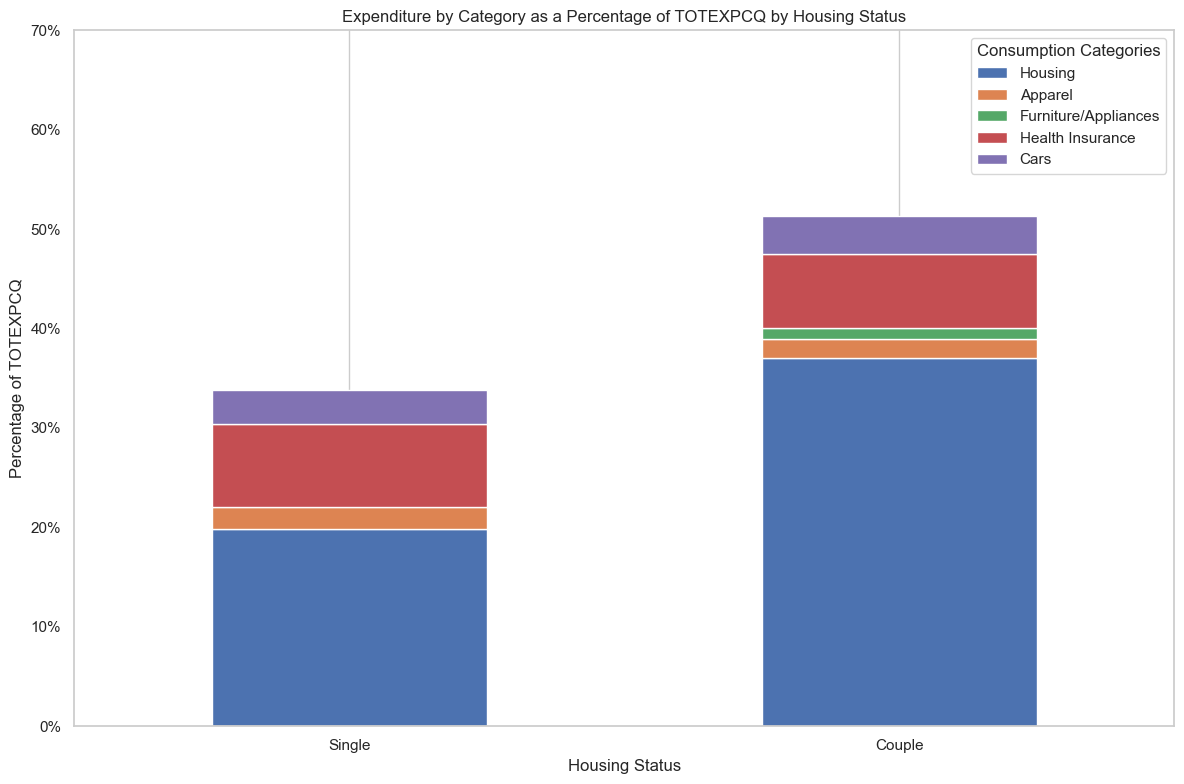

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "TOTEXPCQ", "FINCBTAX", "HOUSCQ", "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC", "AGE_REF", "ST_HOUS"]
data_ce = df[columns_to_select]

# Calculer les parts pour chaque catégorie
categories = {
    "Housing": ["HOUSCQ"],
    "Apparel": ["APPARCQ"],
    "Furniture/Appliances": ["FURNTRCQ", "MAJAPPCQ"],
    "Health Insurance": ["HLTHINCQ"],
    "Cars": ["ECARTKUC", "ECARTKNC"]
}

for category, columns in categories.items():
    data_ce[category] = data_ce[columns].sum(axis=1) / data_ce["TOTEXPCQ"] * 100

# Calculer la moyenne des dépenses par statut de logement (ST_hous)
housing_status_summary = data_ce.groupby('ST_HOUS')[list(categories.keys())].mean()

# Créer le graphique
plt.figure(figsize=(12, 8))
housing_status_summary.plot(kind='bar', stacked=True, ax=plt.gca())

# Ajouter des labels et un titre en anglais
plt.title('Expenditure by Category as a Percentage of TOTEXPCQ by Housing Status')
plt.xlabel('Housing Status')
plt.ylabel('Percentage of TOTEXPCQ')
plt.xticks(ticks=[0, 1], labels=['Single', 'Couple'], rotation=0)  # Étiquettes des statuts de logement

# Afficher les pourcentages dans les barres
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.gca().set_ylim(0, 70)  # Définir les limites de l'axe y entre 0 et 70%
plt.legend(title='Consumption Categories')
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()

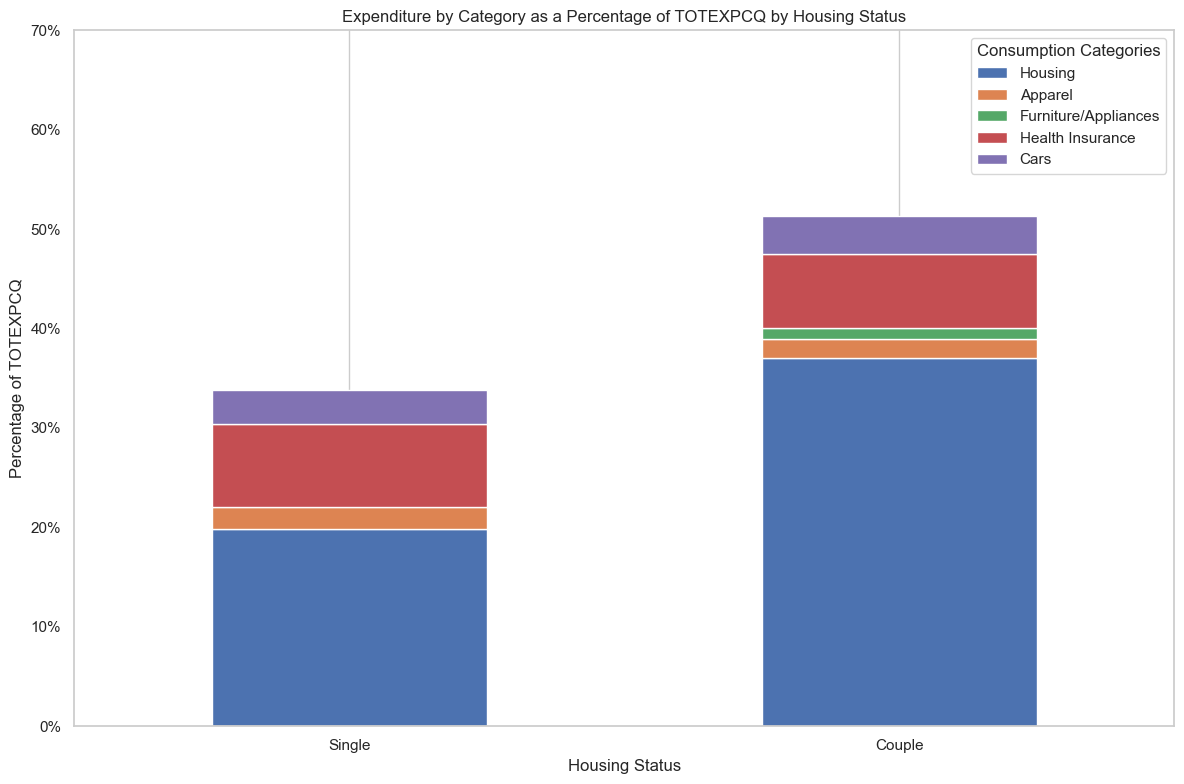

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Sélectionner les colonnes souhaitées
columns_to_select = ["NEWID", "TOTEXPCQ", "FINCBTAX", "HOUSCQ", "APPARCQ", "MAJAPPCQ", "FURNTRCQ", "HLTHINCQ", "ECARTKNC", "ECARTKUC", "AGE_REF", "ST_HOUS"]
data_ce = df[columns_to_select]

# Supprimer les lignes où TOTEXPCQ est égal à 0
data_ce = data_ce[data_ce["TOTEXPCQ"] != 0]

# Supprimer les observations où FINCBTAX < TOTEXPCQ
data_ce = data_ce[data_ce['FINCBTAX'] >= data_ce['TOTEXPCQ']]

# Définir les catégories d'âge
bins = [18, 35, 50, 65, 100]
labels = ['18-34', '35-49', '50-64', '65+']
data_ce['age_category'] = pd.cut(data_ce['AGE_REF'], bins=bins, labels=labels, right=False)

# Calculer les parts pour chaque catégorie
categories = {
    "Housing": ["HOUSCQ"],
    "Apparel": ["APPARCQ"],
    "Furniture/Appliances": ["FURNTRCQ", "MAJAPPCQ"],
    "Health Insurance": ["HLTHINCQ"],
    "Cars": ["ECARTKUC", "ECARTKNC"]
}

for category, columns in categories.items():
    data_ce[category] = data_ce[columns].sum(axis=1) / data_ce["TOTEXPCQ"] * 100

# Calculer la moyenne des dépenses par statut de logement (ST_hous)
housing_status_summary = data_ce.groupby('ST_HOUS')[list(categories.keys())].mean()

# Créer le graphique
plt.figure(figsize=(12, 8))
housing_status_summary.plot(kind='bar', stacked=True, ax=plt.gca())

# Ajouter des labels et un titre en anglais
plt.title('Expenditure by Category as a Percentage of TOTEXPCQ by Housing Status')
plt.xlabel('Housing Status')
plt.ylabel('Percentage of TOTEXPCQ')
plt.xticks(ticks=[0, 1], labels=['Single', 'Couple'], rotation=0)  # Étiquettes des statuts de logement

# Afficher les pourcentages dans les barres
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.gca().set_ylim(0, 70)  # Définir les limites de l'axe y entre 0 et 70%
plt.legend(title='Consumption Categories')
plt.grid(axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()